# Примеры
### Конверсия рекламы
Имеем 2 дизайна рекламы. Конверсия считается количеством кликов. Мы моделируем реальность двух реклам как вероятности клика
- Реклама один: $p_1 = 0.19$
- Реклама два: $p_2 = 0.15$

Найти оптимальную рекламу:
- A/B тест 
- эпсилон жадной стратегией
- оптимизм в неопределенности
- UCB1
- выборка Томпсона

### A/B тест
В A/B тесте необходимо просести испытания для разных реклам, и затем с помощью тестов гипотез доказать, что есть различия в показах и оно статистически значимо

Помтроим распределение вероятностей для  100 испытаний для каждой группы и выделем на график
$$ P(n,k) = C_{n,k}\cdot p^k(1-p)^{n-k} $$

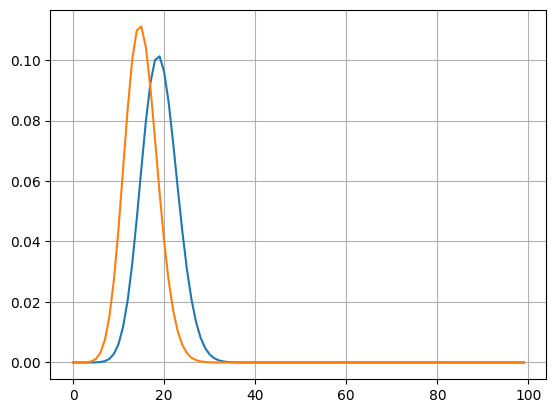

In [62]:
from math import comb
import numpy as np
import matplotlib.pyplot as plt
n = 100
v1 = np.zeros(n)
v2 = np.zeros(n)


p1 = 0.19
p2 = 0.15
for i in range(n):
    v1[i] = comb(n, i)*p1**i*(1-p1)**(n-i)
    v2[i] = comb(n, i)*p2**i*(1-p2)**(n-i)
# x = np.linspace(0,n,n)/n
plt.plot(v1)
plt.plot(v2)
plt.grid(True)

Промоделируем для каждой группы выборки с вероятностями конверсий $p_1 = 0.19$ и $p_2 = 0.15$

In [63]:
#from scipy.stats import binom
samples1, samples2 = [],[]
N = 500

def random(p1,p2):
    for i in range(N):
        r1 = np.random.choice([1,0],p=[p1,1-p1])
        samples1.append(r1)
        r2 = np.random.choice([1,0],p=[p2,1-p2])
        samples2.append(r2)
    return samples1, samples2

samples1, samples2 = random(p1,p2)


In [64]:
print(samples1)
print(samples2)

[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

Сделаем проверку гипотез. Гипотеза $H_0$ заключается в том, что обе выборки имеют равные средние значения (различия между средними не значительны)

In [65]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(samples1, samples2)
print("t-статистика:", t_stat)
print("p-value:", p_value)

if p_value > 0.05:
    print("Средние значения выборок не различаются")
else:
    print("Средние значения выборок различаются")

t-статистика: 1.6689211027752815
p-value: 0.09544665921829915
Средние значения выборок не различаются


### Эпсилон жадная стратегия
В эпсилон жадной стратегии выбор делается на каждом шаге

In [80]:
def get_reward(prob):
    reward = np.random.choice([1,0],p=[prob,1-prob])
    return reward

eps = 0.1 
#eps = 0.5
REWARD = []

t1 = [np.random.choice([1,0],p=[p1,1-p1])]
t2 = [np.random.choice([1,0],p=[p2,1-p2])]
r1 = np.random.rand()
r2 = np.random.rand()

select = False
if t1>t2:
    select = True

reward = []    

for i in range(N*2):
    # eps = eps*50/(i+50)
    r = np.random.rand()
    if r<eps:
        if np.random.rand() < 0.5:
            select = not select

    if select:
        r1 = np.random.choice([1,0],p=[p1,1-p1])
        t1.append(r1)
        REWARD.append(p1)
        reward.append(r1)
    else:
        r2 = np.random.choice([1,0],p=[p2,1-p2])
        t2.append(r2)
        REWARD.append(p2)
        reward.append(r2)
        
    m1, m2 = np.mean(t1), np.mean(t2)

    if m1>m2:
        select = True
    else:
        select = False
    
print(m1)
print(m2)
print(REWARD)
print(reward)


0.19787234042553192
0.0967741935483871
[0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.15, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.15, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.15, 0.19, 0.19, 0.15, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.15, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.15, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.15, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 

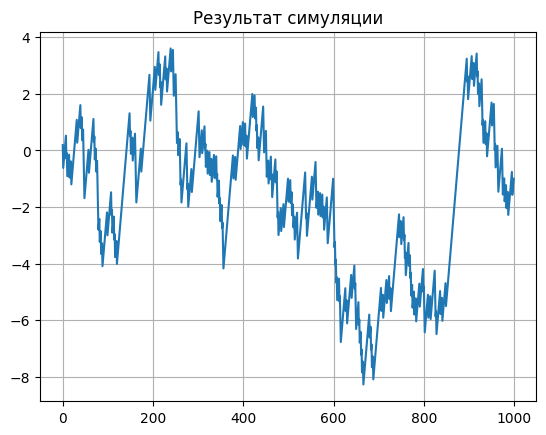

In [88]:
optim_reward = np.ones_like(reward)*p1
regret = optim_reward.cumsum() - np.cumsum(reward)
print(reward)

plt.title('Результат симуляции')
plt.plot(regret)

plt.grid(True)
#plt.plot(optim_reward.cumsum())
#plt.plot(np.cumsum(reward))


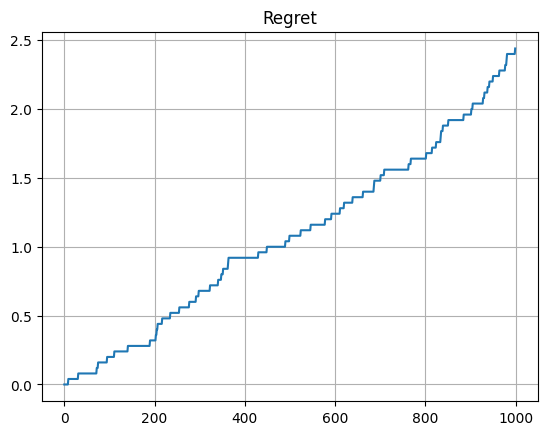

In [89]:
regret = optim_reward.cumsum() - np.cumsum(REWARD)
plt.title('Regret')
plt.plot(regret)
plt.grid(True)

### Оптимизм в неопределенности
В этом алгоритме присваиваем каждой руке заведомо большое значение reward. Обновляем это значение и на каждом шаге выбираем руку с большим значением reward

0.20091848450057406
0.1984732824427481
871
131


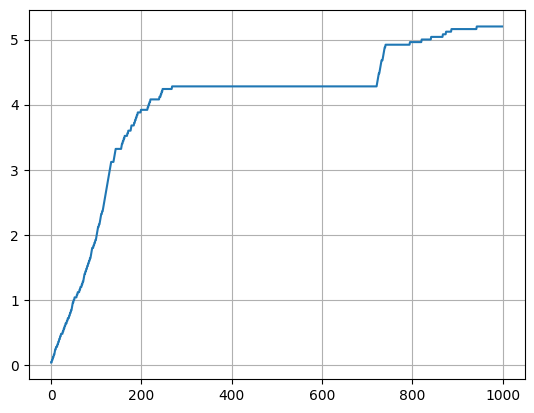

In [90]:
t1 = [10]
t2 = [10]
REWARD = []
for i in range(N*2):
    if np.mean(t1)>np.mean(t2):
        reward = get_reward(p1)
        t1.append(reward)
        REWARD.append(p1)
    else:
        reward = get_reward(p2)
        t2.append(reward)
        REWARD.append(p2)

optim_reward = np.ones_like(REWARD)*p1
regret = optim_reward.cumsum() - np.cumsum(REWARD)
plt.plot(regret)
plt.grid(True)
# plt.plot(optim_reward.cumsum())
# plt.plot(np.cumsum(REWARD))
print(np.mean(t1))
print(np.mean(t2))
print(len(t1))
print(len(t2))

### UCB1
$$ a = \bar{r_j}+\sqrt{\frac{2\ln{n}}{n_j}} $$

704
298
0.19176136363636365
0.11409395973154363


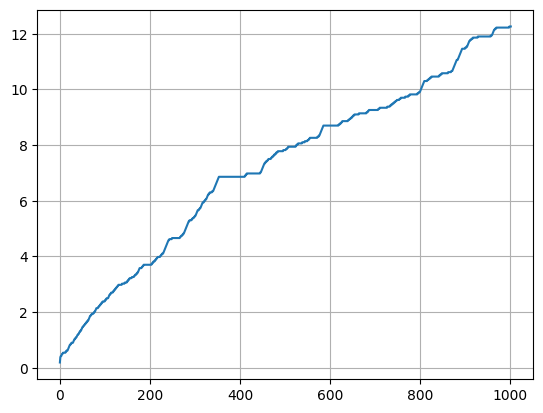

In [ ]:
t1 = [get_reward(p1)]
t2 = [get_reward(p2)]
REWARD = [t1[-1], t2[-1]]

for i in range(N*2):
    a1 = np.mean(t1) + np.sqrt(2*np.log(len(REWARD))/len(t1))
    a2 = np.mean(t2) + np.sqrt(2*np.log(len(REWARD))/len(t2))
    if a1>a2:
        reward = get_reward(p1)
        t1.append(reward)
        REWARD.append(p1)
    else:
        reward = get_reward(p2)
        t2.append(reward)
        REWARD.append(p2)
#print(np.array(REWARD))
optim_reward = np.ones_like(REWARD)*p1
regret = optim_reward.cumsum() - np.cumsum(REWARD)
plt.plot(regret)
plt.grid(True)
#plt.plot(optim_reward.cumsum())
#plt.plot(np.cumsum(REWARD))

print(len(t1))
print(len(t2))
print(np.mean(t1))

print(np.mean(t2))

### Выборка Томпсона
В этом методе на каждый оцениваемый парамтер строится распределение. Для выбора руки семплируем из каждого распределения и выбираем ту руку, у которой вероятность больше

490
512
0.1653061224489796
0.146484375


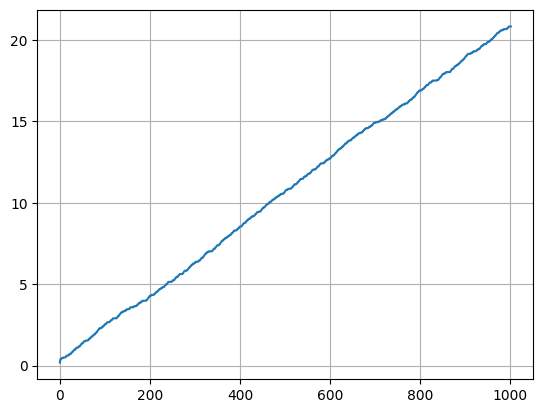

In [ ]:
from scipy.stats import beta
alpha1, alpha2 = 1,1
beta1,beta2 = 1,1
reward1, reward2 = get_reward(p1), get_reward(p2)
t1 = [reward1]
t2 = [reward2]

def density(reward1,alpha1, beta1):
    if reward1 == 1:
        alpha1 += 1
    else:
        beta1 += 1
    return beta(alpha1,beta1), alpha1, beta1
rv1, alpha1, beta1 = density(reward1,alpha1, beta1)
rv2, alpha2, beta2 = density(reward2,alpha2, beta2)


REWARD = [t1[0],t2[0]]

for i in range(N*2):
    sample1 = rv1.rvs(size=1)
    sample2 = rv1.rvs(size=1)
    if sample1>sample2:
        reward1 = get_reward(p1)
        rv1, alpha1, beta1 = density(reward1,alpha1, beta1)
        t1.append(reward1)
        REWARD.append(p1)
    else:
        reward2 = get_reward(p2)
        rv2, alpha2, beta2 = density(reward2,alpha2, beta2)
        t2.append(reward2)
        REWARD.append(p2)

optim_reward = np.ones_like(REWARD)*p1
regret = optim_reward.cumsum() - np.cumsum(REWARD)
plt.plot(regret)
plt.grid(True)
print(len(t1))
print(len(t2))
print(np.mean(t1))

print(np.mean(t2))

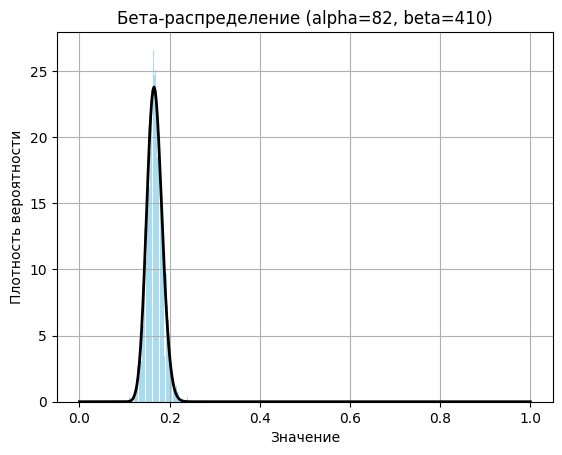

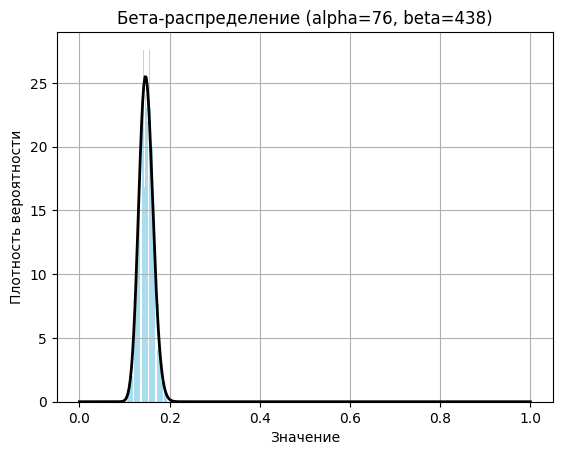

In [ ]:
def plot_dens(alpha,betap):

    # Создание объекта случайной величины бета-распределения
    rv = beta(alpha, betap)
    # Генерация выборки из бета-распределения
    sample = rv.rvs(size=1000)

    # Построение гистограммы выборки
    plt.hist(sample, bins=50, density=True, alpha=0.7, rwidth=0.85, color='skyblue')

    # Построение графика плотности вероятности
    x = np.linspace(0, 1, 400)
    plt.plot(x, rv.pdf(x), 'k-', lw=2)

    # Отображение графика
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.title('Бета-распределение (alpha={}, beta={})'.format(alpha, betap))
    plt.grid(True)
    plt.show()

plot_dens(alpha1,beta1)


plot_dens(alpha2,beta2)

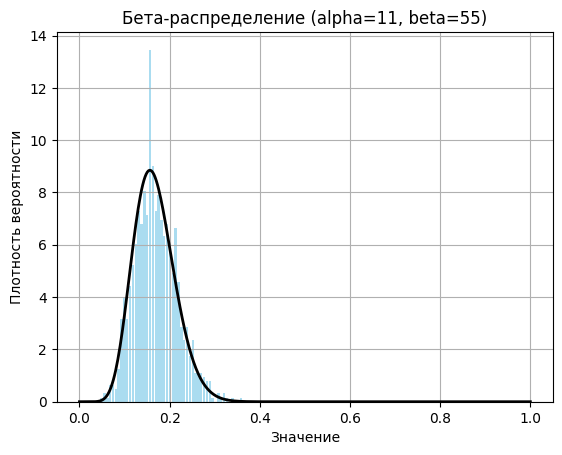

In [ ]:
plot_dens(11,55)